In [301]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [302]:
from rlway.pyosrd import OSRD

In [303]:
OSRD.use_cases

['cvg_dvg',
 'point_switch',
 'station_capacity2',
 'straight_line',
 'straight_line_with_blocks']

In [304]:
use_case='straight_line_with_blocks'
sim = OSRD(use_case=use_case, dir='tmp')

[17:26:18,369] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[17:26:18,403] [INFO]              [FullInfra] parsing infra
[17:26:18,464] [INFO]              [FullInfra] adaptation to kotlin
[17:26:18,494] [INFO]              [FullInfra] loading signals
[17:26:18,500] [INFO]              [FullInfra] building blocks
[17:26:18,507] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[17:26:18,520] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.40
[17:26:18,573] [DEBUG]             [Allowance] computing range n°1
[17:26:18,576] [DEBUG]             [Allowance]   computing section n°1
[17:26:18,576] [DEBUG]             [Allowance]   target time = 274.13399999999996
[17:26:18,577] [DEBUG]             [Allowance]     starting attempt 1
[17:26:18,578] [DEBUG]             [Allowance]     envelope time 452.323
[17:26:18,578] [DEBUG]             [Allowance]     starting attempt 2
[17:26:18,579] [DEBUG]             [Allo

In [305]:
sim.train_track_sections(0)

[{'id': 'T', 'direction': 'START_TO_STOP'}]

In [307]:
sim.space_time_chart_plotly(1, points_to_show=['signal','station'], eco_or_base='base')

In [308]:
from rlway.schedule_from_osrd import schedule_from_osrd

<Axes: xlabel='Time', ylabel='Track sections'>

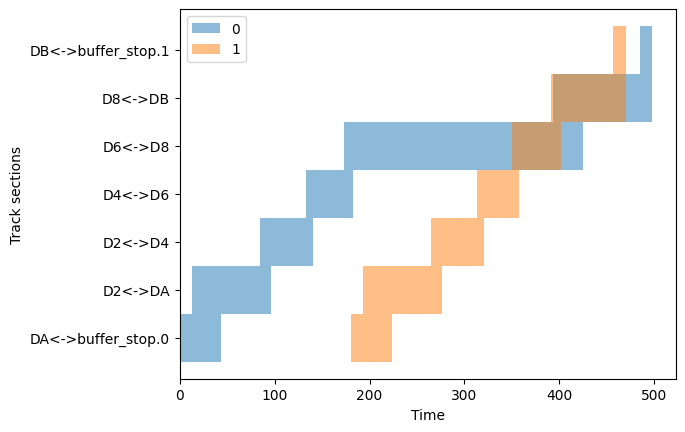

In [309]:
s = schedule_from_osrd(sim, eco_or_base='eco')
s.plot()

<Axes: xlabel='Time', ylabel='Track sections'>

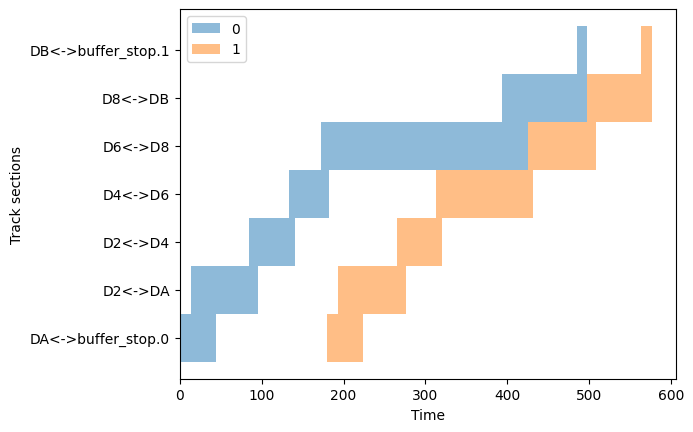

In [317]:
s.propagate_delay(0)[0].plot()

In [318]:
s.draw_graph()